# Neural Network on MNIST Dataset

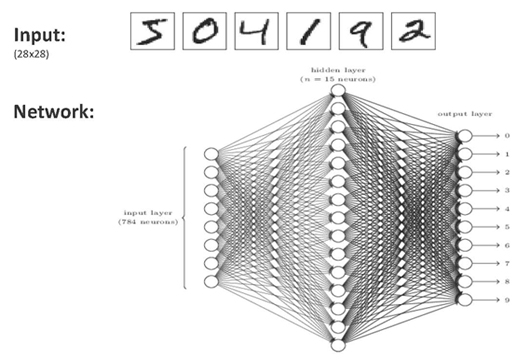

In [4]:
from IPython.display import Image
Image('images/page34.jpg')

* Creating a simple three layer neural network by using the
  MNIST dataset that the TensorFlow package provides

* This MNIST dataset is a set of 28 X 28 pixel grayscale images
  which represent hand-written digits

* It has 55,000 training rows, 10,000 testing rows and 5,000
  validation rows

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load Dataset

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


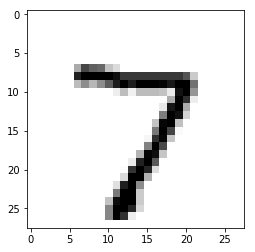

In [7]:
# Get the first images from the test-set.
images = mnist.test.images[0:9]
plt.imshow(images[0].reshape(28,28), cmap='binary')
plt.show()

# Variable Set up

In [8]:
# Python optimisation variables
learning_rate = 0.5
epochs = 10
batch_size = 100

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

# Weight and Bias Code

In [9]:
# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

# Hidden Layer Node Setup

In [10]:
# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

# Output Layer Node Setup

Setup the output layer, y_

In [11]:
# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

# Optimisation function

Cross entropy cost function

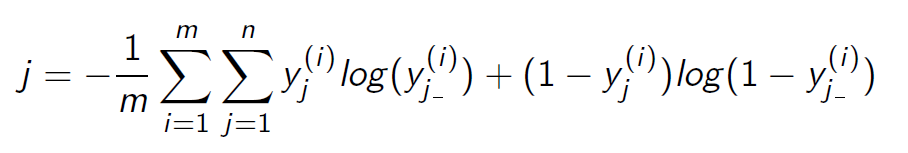

In [14]:
from IPython.display import Image
Image('images/crossentropy.png')

In [15]:
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

# Optimizer Algorithm Setup

This function will then perform the gradient descent and the
backpropagation for you.

In [16]:
# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cross_entropy)


# Accuracy Code

Setup the variable initialisation operation and an operation to
measure the accuracy of our predictions

In [17]:
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Setup Code for the Training Process

In [18]:
# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   total_batch = int(len(mnist.train.labels) / batch_size)
   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
   print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
   train_writer = tf.summary.FileWriter('C:\\Users\\mukesh.saraswat\\Desktop\\Code')
   train_writer.add_graph(sess.graph)

Epoch: 1 cost = 0.763
Epoch: 2 cost = 0.305
Epoch: 3 cost = 0.232
Epoch: 4 cost = 0.186
Epoch: 5 cost = 0.158
Epoch: 6 cost = 0.136
Epoch: 7 cost = 0.125
Epoch: 8 cost = 0.105
Epoch: 9 cost = 0.093
Epoch: 10 cost = 0.080
0.9731
